In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2021, GESIS"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi",                
               "Claudia Wagner",
               "Markus Strohmaier"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

# Toy-Example (Figure 1)

In [2]:
import os
import sys
import operator
import matplotlib
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=matplotlib.MatplotlibDeprecationWarning)

In [4]:
%load_ext autoreload
%autoreload 2

from org.gesis.lib.rank import _gini_function_matrix_rank
from org.gesis.lib.rank import _fm_function_matrix_rank
from org.gesis.lib.viz import plot_setup
from org.gesis.model.DPAH import DPAH
from org.gesis.lib import utils
from org.gesis.lib import graph

## Setup

In [5]:
font = {'family' : 'normal',
        'weight' : 'normal', #bold
        'size'   : 15}

matplotlib.rc('font', **font)
colors = {'min':'#ec8b67', 'maj':'#6aa8cb'}

PLOTS = 'results/plots/' # Folder to store plots
plot_setup(latex=True)   # Latex environment
node_size = 70           # size of nodes (viz)
arrow_size = 6           # size of edge arrow (viz)
edge_width = 0.5         # thickness of edges
lw = 1.0                 # line-width (ranking) (viz)
nww = 0.21
nwh = 0.21
edgecolor = '#c8cacc'

In [6]:
N = 20
fm = 0.2
d = 0.2
metric = 'pagerank'
ncores = 40
seed = 377

## Generating Networks and Measuring Inequalities

### Heterophilic

In [7]:
G_hete = DPAH(N=N, fm=fm, d=d, plo_M=2., plo_m=2., h_MM=0.2, h_mm=0.2, verbose=False, seed=seed) #7

# nodes metadata
df_metadata_hete = graph.get_node_metadata_as_dataframe(G_hete, ncores)

# individual and group inequalities
rank_hete, gt_hete = _gini_function_matrix_rank(df_metadata_hete, metric)
rank_hete, fmt_hete, minority_fraction_hete = _fm_function_matrix_rank(df_metadata_hete, metric)

# gini and me values
g_hete = utils.gini(df_metadata_hete[metric].astype(np.float).values)     # global vertical ineq.
me_hete = utils.mean_error([minority_fraction_hete] * len(fmt_hete), fmt_hete)  # global horizontal ineq. using me

2021-02-12 01:45:14	cot_per_node...
2021-02-12 01:45:15	cot...
2021-02-12 01:45:15	wtf...


### Hete/Homo

In [8]:
G_heho = DPAH(N=N, fm=fm, d=d, plo_M=2., plo_m=2., h_MM=0.2, h_mm=0.8, verbose=False, seed=seed) #17

# nodes metadata
df_metadata_heho = graph.get_node_metadata_as_dataframe(G_heho, ncores)

# individual and group inequalities
rank_heho, gt_heho = _gini_function_matrix_rank(df_metadata_heho, metric)
rank_heho, fmt_heho, minority_fraction_heho = _fm_function_matrix_rank(df_metadata_heho, metric)

# gini and me values
g_heho = utils.gini(df_metadata_heho[metric].astype(np.float).values)     # global vertical ineq.
me_heho = utils.mean_error([minority_fraction_heho] * len(fmt_heho), fmt_heho)  # global horizontal ineq. using me

2021-02-12 01:45:16	cot_per_node...
2021-02-12 01:45:17	cot...
2021-02-12 01:45:17	wtf...


### Neutral

In [9]:
G_neu = DPAH(N=N, fm=fm, d=d, plo_M=2., plo_m=2., h_MM=0.5, h_mm=0.5, verbose=False, seed=seed) #10

# nodes metadata
df_metadata_neu = graph.get_node_metadata_as_dataframe(G_neu, ncores)

# individual and group inequalities
rank_neu, gt_neu = _gini_function_matrix_rank(df_metadata_neu, metric)
rank_neu, fmt_neu, minority_fraction_neu = _fm_function_matrix_rank(df_metadata_neu, metric)

# gini and me values
g_neu = utils.gini(df_metadata_neu[metric].astype(np.float).values)     # global vertical ineq.
me_neu = utils.mean_error([minority_fraction_neu] * len(fmt_neu), fmt_neu)  # global horizontal ineq. using me

2021-02-12 01:45:18	cot_per_node...
2021-02-12 01:45:19	cot...
2021-02-12 01:45:19	wtf...


### Homophilic

In [10]:
G_homo = DPAH(N=N, fm=fm, d=d, plo_M=2., plo_m=2., h_MM=0.8, h_mm=0.8, verbose=False, seed=seed) #20

# nodes metadata
df_metadata_homo = graph.get_node_metadata_as_dataframe(G_homo, ncores)

# individual and group inequalities
rank_homo, gt_homo = _gini_function_matrix_rank(df_metadata_homo, metric)
rank_homo, fmt_homo, minority_fraction_homo = _fm_function_matrix_rank(df_metadata_homo, metric)

# gini and me values
g_homo = utils.gini(df_metadata_homo[metric].astype(np.float).values)     # global vertical ineq.
me_homo = utils.mean_error([minority_fraction_homo] * len(fmt_homo), fmt_homo)  # global horizontal ineq. using me

2021-02-12 01:45:20	cot_per_node...
2021-02-12 01:45:20	cot...
2021-02-12 01:45:20	wtf...


### Homo/Hete

In [11]:
G_hohe = DPAH(N=N, fm=fm, d=d, plo_M=2., plo_m=2., h_MM=0.8, h_mm=0.2, verbose=False, seed=seed) #6

# nodes metadata
df_metadata_hohe = graph.get_node_metadata_as_dataframe(G_hohe, ncores)

# individual and group inequalities
rank_hohe, gt_hohe = _gini_function_matrix_rank(df_metadata_hohe, metric)
rank_hohe, fmt_hohe, minority_fraction_hohe = _fm_function_matrix_rank(df_metadata_hohe, metric)

# gini and me values
g_hohe = utils.gini(df_metadata_hohe[metric].astype(np.float).values)     # global vertical ineq.
me_hohe = utils.mean_error([minority_fraction_hohe] * len(fmt_hohe), fmt_hohe)  # global horizontal ineq. using me

2021-02-12 01:45:21	cot_per_node...
2021-02-12 01:45:22	cot...
2021-02-12 01:45:22	wtf...


## Figure 1

results/plots/example_2.pdf saved!


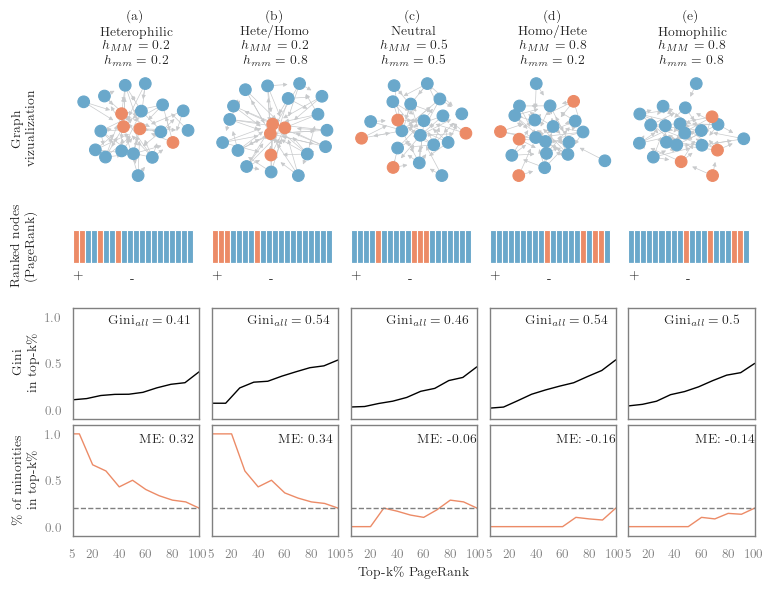

In [12]:
def get_sorted_nodes(df):
    if df.shape[0] == 10:
        labels = ['a','b','c','d','e','f','g','h','i','j']
    else:
        labels = [str(row.node) for id,row in df.iterrows()]
    tmp = df[['node','minority','pagerank']].copy()
    tmp = tmp.sort_values("node", ascending=True)
    tmp.loc[:,'name'] = labels
    tmp = tmp.sort_values("pagerank", ascending=False)
    return tmp.reset_index(drop=True)

def draw_rank(sorted_df, ax):
    for i,row in sorted_df.iterrows():
        ax.barh(2, 1, left=i, height=1, color='white')
        ax.barh(1, 1, left=i, height=1, color=colors['min' if row.minority==1 else 'maj'])
        ax.barh(0, 1, left=i, height=1, color='white')
        ax.text(0.1,0,'+' if i==0 else '')
        ax.text(9.5,0,'-' if i==0 else '')
        #ax.text(-1,0,'Ranked nodes', rotation=90, va='center')
    ax.axis('off')
    
ginis = [g_hete, g_heho, g_neu, g_hohe, g_homo]
mes = [me_hete, me_heho, me_neu, me_hohe, me_homo]

w=2.2
h=1.2
r=4
c=5
fig, axes = plt.subplots(r,c,figsize=(r*w, c*h),sharex=False, sharey=False)

# graph hete
#pos = nx.circular_layout(G_hete)
pos = nx.nx_pydot.graphviz_layout(G_hete, prog='neato')
node_color = [colors['min'] if obj['m'] else colors['maj'] for n,obj in G_hete.nodes(data=True)]
nx.draw_networkx_nodes(G_hete, pos, cmap=plt.get_cmap('jet'), node_color=node_color, node_size=node_size, ax=axes[0,0])
edge_color = [edgecolor for e in G_hete.edges()]
nx.draw_networkx_edges(G_hete, pos, edgelist=G_hete.edges(), edge_color=edgecolor, width=edge_width, arrows=True, arrowsize=arrow_size, ax=axes[0,0])
axes[0,0].axis('off')

# graph heho
#pos = nx.circular_layout(G_heho)
pos = nx.nx_pydot.graphviz_layout(G_heho, prog='neato')
node_color = [colors['min'] if obj['m'] else colors['maj'] for n,obj in G_heho.nodes(data=True)]
nx.draw_networkx_nodes(G_heho, pos, cmap=plt.get_cmap('jet'), node_color=node_color, node_size=node_size, ax=axes[0,1])
edge_color = [edgecolor for e in G_heho.edges()]
nx.draw_networkx_edges(G_heho, pos, edgelist=G_heho.edges(), edge_color=edgecolor, width=edge_width, arrows=True, arrowsize=arrow_size, ax=axes[0,1])
axes[0,1].axis('off')

# graph neu
#pos = nx.circular_layout(G_neu)
pos = nx.nx_pydot.graphviz_layout(G_neu, prog='neato')
node_color = [colors['min'] if obj['m'] else colors['maj'] for n,obj in G_neu.nodes(data=True)]
nx.draw_networkx_nodes(G_neu, pos, cmap=plt.get_cmap('jet'), node_color=node_color, node_size=node_size, ax=axes[0,2])
edge_color = [edgecolor for e in G_neu.edges()]
nx.draw_networkx_edges(G_neu, pos, edgelist=G_neu.edges(), edge_color=edgecolor, width=edge_width, arrows=True, arrowsize=arrow_size, ax=axes[0,2])
axes[0,2].axis('off')

# graph hohe
#pos = nx.circular_layout(G_hohe)
pos = nx.nx_pydot.graphviz_layout(G_hohe, prog='neato')
node_color = [colors['min'] if obj['m'] else colors['maj'] for n,obj in G_hohe.nodes(data=True)]
nx.draw_networkx_nodes(G_hohe, pos, cmap=plt.get_cmap('jet'), node_color=node_color, node_size=node_size, ax=axes[0,3])
edge_color = [edgecolor for e in G_hohe.edges()]
nx.draw_networkx_edges(G_hohe, pos, edgelist=G_hohe.edges(), edge_color=edgecolor, width=edge_width, arrows=True, arrowsize=arrow_size, ax=axes[0,3])
axes[0,3].axis('off')

# graph homo
#pos = nx.circular_layout(G_homo)
pos = nx.nx_pydot.graphviz_layout(G_homo, prog='neato')
node_color = [colors['min'] if obj['m'] else colors['maj'] for n,obj in G_homo.nodes(data=True)]
nx.draw_networkx_nodes(G_homo, pos, cmap=plt.get_cmap('jet'), node_color=node_color, node_size=node_size, ax=axes[0,4])
edge_color = [edgecolor for e in G_homo.edges()]
nx.draw_networkx_edges(G_homo, pos, edgelist=G_homo.edges(), edge_color=edgecolor, width=edge_width, arrows=True, arrowsize=arrow_size, ax=axes[0,4])
axes[0,4].axis('off')
axes[0,0].set_ylabel("Graph")

# ranking
draw_rank(get_sorted_nodes(df_metadata_hete), axes[1,0])
draw_rank(get_sorted_nodes(df_metadata_heho), axes[1,1])
draw_rank(get_sorted_nodes(df_metadata_neu),  axes[1,2])
draw_rank(get_sorted_nodes(df_metadata_hohe), axes[1,3])
draw_rank(get_sorted_nodes(df_metadata_homo), axes[1,4])


# Inequality (individual inequality)
axes[2,0].plot(rank_hete, gt_hete, 'black', linewidth=lw)
axes[2,1].plot(rank_heho, gt_heho, 'black', linewidth=lw)
axes[2,2].plot(rank_neu, gt_neu, 'black', linewidth=lw)
axes[2,3].plot(rank_hohe, gt_hohe, 'black', linewidth=lw)
axes[2,4].plot(rank_homo, gt_homo, 'black', linewidth=lw)
axes[2,0].set_ylabel("Gini\nin top-k\%")

# Inequity (group inequality)
axes[3,0].plot(rank_hete, fmt_hete, colors['min'], linewidth=lw)
axes[3,1].plot(rank_heho, fmt_heho, colors['min'], linewidth=lw)
axes[3,2].plot(rank_neu, fmt_neu, colors['min'], linewidth=lw)
axes[3,3].plot(rank_hohe, fmt_hohe, colors['min'], linewidth=lw)
axes[3,4].plot(rank_homo, fmt_homo, colors['min'], linewidth=lw)
axes[3,0].set_ylabel("\% of minorities\nin top-k\%")

# Labels
for i in np.arange(0,c):
    axes[3,i].axhline(fm, c='grey', ls='--', lw=1.0)
    axes[2,i].set_xticks([])
    axes[2,i].set_xlabel('')
        
    #axes[2,i].axhline(ginis[i], c='grey', ls='--', lw=1.0)
    axes[2,i].text(35, 0.9, "Gini$_{}={}$".format('{all}',round(ginis[i],2)))
    axes[3,i].text(55, 0.9, "ME: {}".format(round(mes[i],2)))
    
    axes[2,i].set_ylim((-0.1,1.1))
    axes[3,i].set_ylim((-0.1,1.1))
    axes[2,i].set_xlim((10,100))
    axes[3,i].set_xlim((10,100))

    axes[3,i].set_xticks(rank_homo[::2])
    
    if i>0:
        axes[2,i].set_yticks([])
        axes[2,i].set_xticks([])
        axes[3,i].set_yticks([])
    
    if c%2 != 0:
        axes[3,i].set_xlabel('' if (i!=int(c/2)) else "Top-k\% PageRank")
        
### Titles
axes[0,0].set_title("(a)\nHeterophilic\n$h_{MM}=0.2$\n$h_{mm}=0.2$")
axes[0,1].set_title("(b)\nHete/Homo\n$h_{MM}=0.2$\n$h_{mm}=0.8$")
axes[0,2].set_title("(c)\nNeutral\n$h_{MM}=0.5$\n$h_{mm}=0.5$")
axes[0,3].set_title("(d)\nHomo/Hete\n$h_{MM}=0.8$\n$h_{mm}=0.2$")
axes[0,4].set_title("(e)\nHomophilic\n$h_{MM}=0.8$\n$h_{mm}=0.8$")

### y-label (row 0 graphs), (row 1 ranked nodes)
for i in [0,1]:
    axes[i,0].axis('on')
    axes[i,0].spines['top'].set_visible(False)
    axes[i,0].spines['right'].set_visible(False)
    axes[i,0].spines['bottom'].set_visible(False)
    axes[i,0].spines['left'].set_visible(False)
    axes[i,0].set_yticks([])
    axes[i,0].set_xticks([])
axes[0,0].set_ylabel("Graph\nvizualization", labelpad=25)
axes[1,0].set_ylabel("Ranked nodes\n(PageRank)", labelpad=25)

### border color
for ax in axes.flatten():
    ax.tick_params(color='grey', labelcolor='grey')
    for spine in ax.spines.values():
        spine.set_edgecolor('grey')
        
### Save fig        
plt.subplots_adjust(hspace=0.05, wspace=0.1)
fn = os.path.join(PLOTS,'example_2.pdf')
if fn is not None:
    plt.savefig(fn, bbox_inches='tight')
    print("{} saved!".format(fn))
    
plt.show()
plt.close()

## Figure 2

2021-02-12 01:46:04	cot_per_node...
2021-02-12 01:46:05	cot...
2021-02-12 01:46:05	wtf...


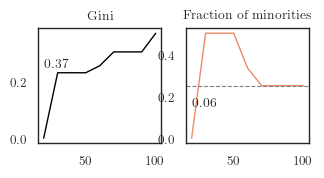

In [13]:
import pandas as pd
import networkx as nx

metric = 'pagerank'

G_toy = nx.DiGraph()
G_toy.add_edge("i", "j")
G_toy.add_edge("k", "l")
G_toy.add_edge("m", "j")
G_toy.add_edge("n", "k")
G_toy.add_edge("n", "o")
G_toy.add_edge("o", "j")
G_toy.add_edge("p", "j")
G_toy.add_edge("l", "j")
G_toy.add_edge("l", "o")

G_toy.graph['label'] = 'm'
nx.set_node_attributes(G_toy, name='m', values={n:n in ['p','o']for n in G_toy.nodes()})
ncores = 40

# # nodes metadata
df_metadata_toy = graph.get_node_metadata_as_dataframe(G_toy, ncores)

# # individual and group inequalities
rank_toy, gt_toy = _gini_function_matrix_rank(df_metadata_toy, metric)
rank_tiy, fmt_toy, minority_fraction_toy = _fm_function_matrix_rank(df_metadata_toy, metric)

# # gini and me values
g_toy = utils.gini(df_metadata_toy[metric].astype(np.float).values)     # global vertical ineq.
me_toy = utils.mean_error([minority_fraction_toy] * len(fmt_toy), fmt_toy)  # global horizontal ineq. using me

### PLOT
plt.close()
fig, axes = plt.subplots(1,2,figsize=(3.5,1.5))

# # gini (left)
axes[0].plot(rank_toy, gt_toy, 'black', linewidth=lw)
axes[0].set_title("Gini")
axes[0].text(s='{}'.format(round(g_toy,2)), x=20, y=0.25)

# # fraction of min (right)
axes[1].plot(rank_toy, fmt_toy, colors['min'], linewidth=lw)
axes[1].set_title("Fraction of minorities")
axes[1].axhline(0.25, ls='--', c='grey')
axes[1].text(s='{}'.format(round(me_toy,2)), x=20, y=0.15)

plt.show()
plt.close()

In [14]:
### viz as dataframe
df_toy = pd.DataFrame({'rank':rank_toy, 'gini':gt_toy, 'fm':fmt_toy})
df_toy

,fm,gini,rank
0,0.000000,0.000000,20.0
1,0.500000,0.233234,30.0
2,0.500000,0.233234,40.0
3,0.500000,0.233234,50.0
4,0.333333,0.258134,60.0
5,0.250000,0.307540,70.0
6,0.250000,0.307540,80.0
7,0.250000,0.307540,90.0
8,0.250000,0.374083,100.0


In [15]:
### top-k% rank
print("top-  k%\tgini\tme\tnodes")
for k in np.arange(20,110,10):
    tmp1 = df_metadata_toy.pagerank.sort_values(ascending=False).unique()
    topk = tmp1[:int(k*tmp1.size/100)]
    tmp1 = df_metadata_toy.query("pagerank in @topk").sort_values('pagerank', ascending=False).node.values
    tmp2 = df_toy.query("rank==@k")
    print("top-{:3d}%\t{:.2f}\t{:.2f}\t{}".format(k, tmp2.gini.values[0],tmp2.fm.values[0], tmp1))

print("global gini {}".format(g_toy))
print("global mean error {}".format(me_toy))

top-  k%	gini	me	nodes
top- 20%	0.00	0.00	['j']
top- 30%	0.23	0.50	['j']
top- 40%	0.23	0.50	['j' 'o']
top- 50%	0.23	0.50	['j' 'o']
top- 60%	0.26	0.33	['j' 'o' 'l']
top- 70%	0.31	0.25	['j' 'o' 'l']
top- 80%	0.31	0.25	['j' 'o' 'l' 'k']
top- 90%	0.31	0.25	['j' 'o' 'l' 'k']
top-100%	0.37	0.25	['j' 'o' 'l' 'k' 'n' 'p' 'm' 'i']
global gini 0.3740826257888387
global mean error 0.06481481481481481


In [16]:
### original metadata per node
df_metadata_toy.sort_values('pagerank', ascending=False)

,node,minority,indegree,outdegree,pagerank,wtf
3,j,False,5,0,0.393909,0
5,o,True,2,1,0.143312,0
0,l,False,1,2,0.134008,0
7,k,False,1,1,0.086359,0
1,n,False,0,2,0.060603,0
2,p,True,0,1,0.060603,0
4,m,False,0,1,0.060603,0
6,i,False,0,1,0.060603,0
